   #                              Content Based Movie Recomendation System

> 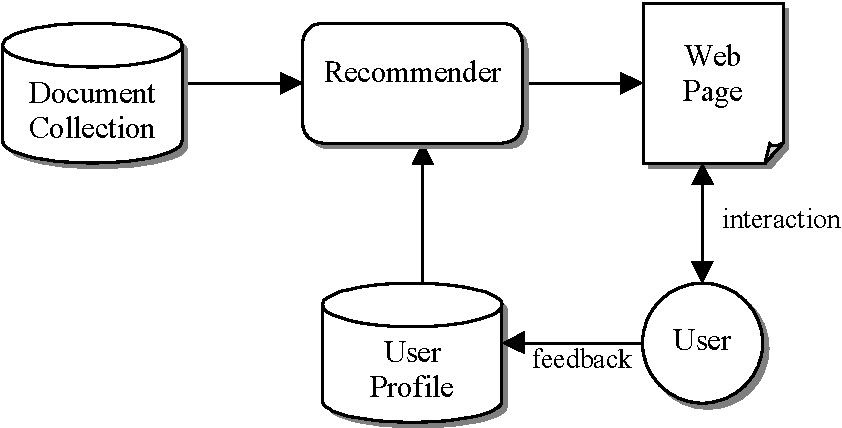



**Welcome to our content-based movie recommendation system! This innovative tool suggests films tailored to your preferences by analyzing your input  interactions.

In [5]:
!pip install wordcloud

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [7]:
movies=pd.read_csv('movies.csv')
ratings=pd.read_csv('ratings.csv')

In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [9]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [10]:
movies.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [11]:
ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [12]:
import pandas as pd

# Assuming 'movie' is a DataFrame
shape_tuple = movies.shape

# Accessing the number of rows and columns
num_rows = shape_tuple[0]
num_columns = shape_tuple[1]

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 10329
Number of columns: 3


In [13]:
movies.shape

(10329, 3)

In [14]:
ratings.shape

(105339, 4)

In [15]:
CL_movies = movies.dropna()

In [16]:
# Create a set of unique genres by iterating over each entry in the 'genres' column of the CL_movies DataFrame,
# splitting the string by '|' delimiter, and adding each genre to the set.
genres = set(genre for genres in CL_movies.genres for genre in genres.split('|'))

# Extract movie titles from the 'title' column of the movies DataFrame, removing the last word (presumably the year),
# and store them in a list.
movie_title = [title.rsplit(' ', 1)[0] for title in movies.title]


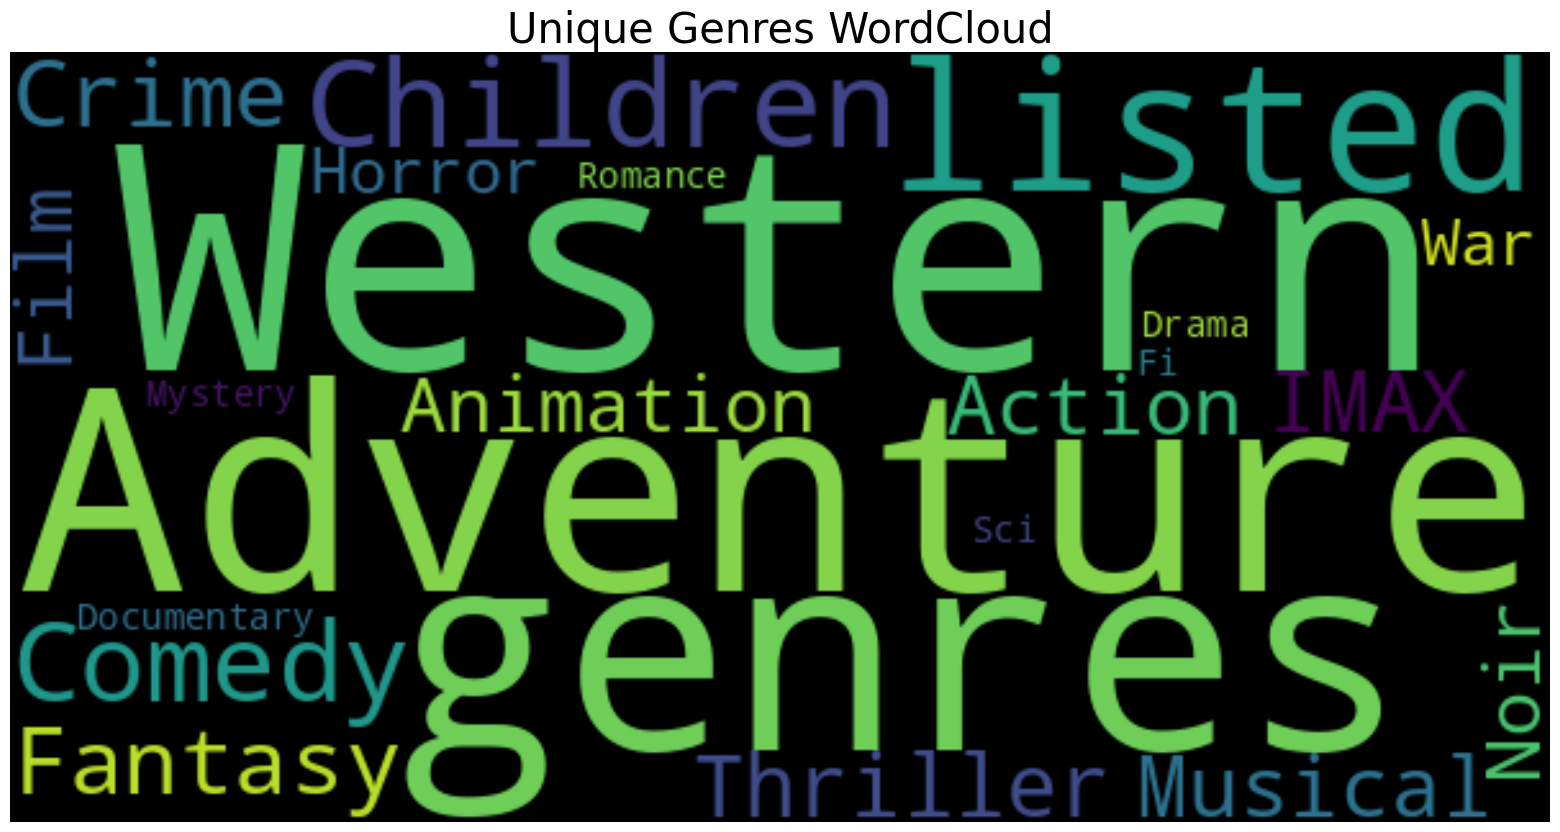

In [17]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the Excel file into a DataFrame
df = pd.read_csv('movies.csv')

# Split the genres string into individual genres and convert to a set to get unique genres
unique_genres = set(df['genres'].str.split('|', expand=True).stack())

# Convert the set of unique genres back to a single string
genres_text = ' '.join(unique_genres)

# Specify the path to a TrueType font file
font_path = 'C:\Windows\Fonts\Calibri.ttf'

# Create a WordCloud object with the specified font
wordcloud = WordCloud(width=600, height=300, background_color='black',).generate(genres_text)

# Plot the WordCloud
plt.figure(figsize=(25, 10))
plt.title('Unique Genres WordCloud', fontsize=30)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


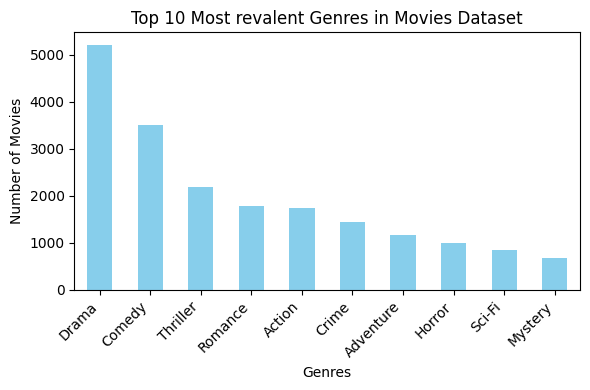

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Splitting the genres string into individual genres
genres_series = movies['genres'].str.split('|', expand=True).stack()

# Counting the occurrences of each genre
genre_counts = genres_series.value_counts()

# Selecting the top 10 genres
top_10_genres = genre_counts.head(10)

# Plotting the bar graph
plt.figure(figsize=(6, 4))
top_10_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most revalent Genres in Movies Dataset')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


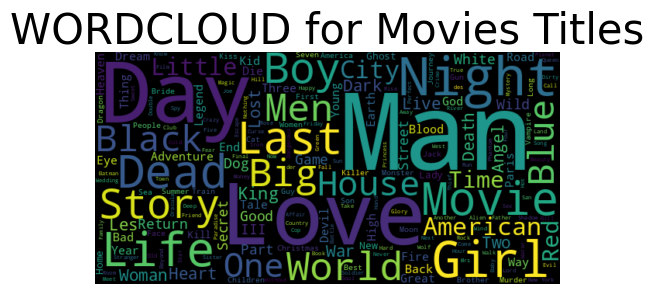

In [29]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the Excel file into a DataFrame
df = pd.read_csv('movies.csv')

# Get unique movie titles
unique_titles = df['title'].unique()

# Convert the array of unique titles to a single string
titles_text = ' '.join(unique_titles)

# Create a WordCloud object with the specified parameters
wordcloud_titles = WordCloud(width=600, height=300, background_color='black', min_font_size=2,
                             min_word_length=3).generate(titles_text)

# Plot the WordCloud
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud_titles, interpolation='bilinear')
plt.title('WORDCLOUD for Movies Titles', fontsize=30)
plt.axis('off')
plt.show()


In [20]:
df=pd.merge(ratings,movies, how='left',on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [21]:
# Group the DataFrame 'df' by the 'title' column and calculate the sum of ratings for each movie
df1 = df.groupby(['title'])[['rating']].sum()

# Select the top 10 movies with the highest total ratings from the grouped DataFrame and store them in 'high_rated'
high_rated = df1.nlargest(10, 'rating')

# Display the first few rows of the 'high_rated' DataFrame to show the top 5 highest-rated movies
high_rated.head(5)


,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5


<BarContainer object of 10 artists>

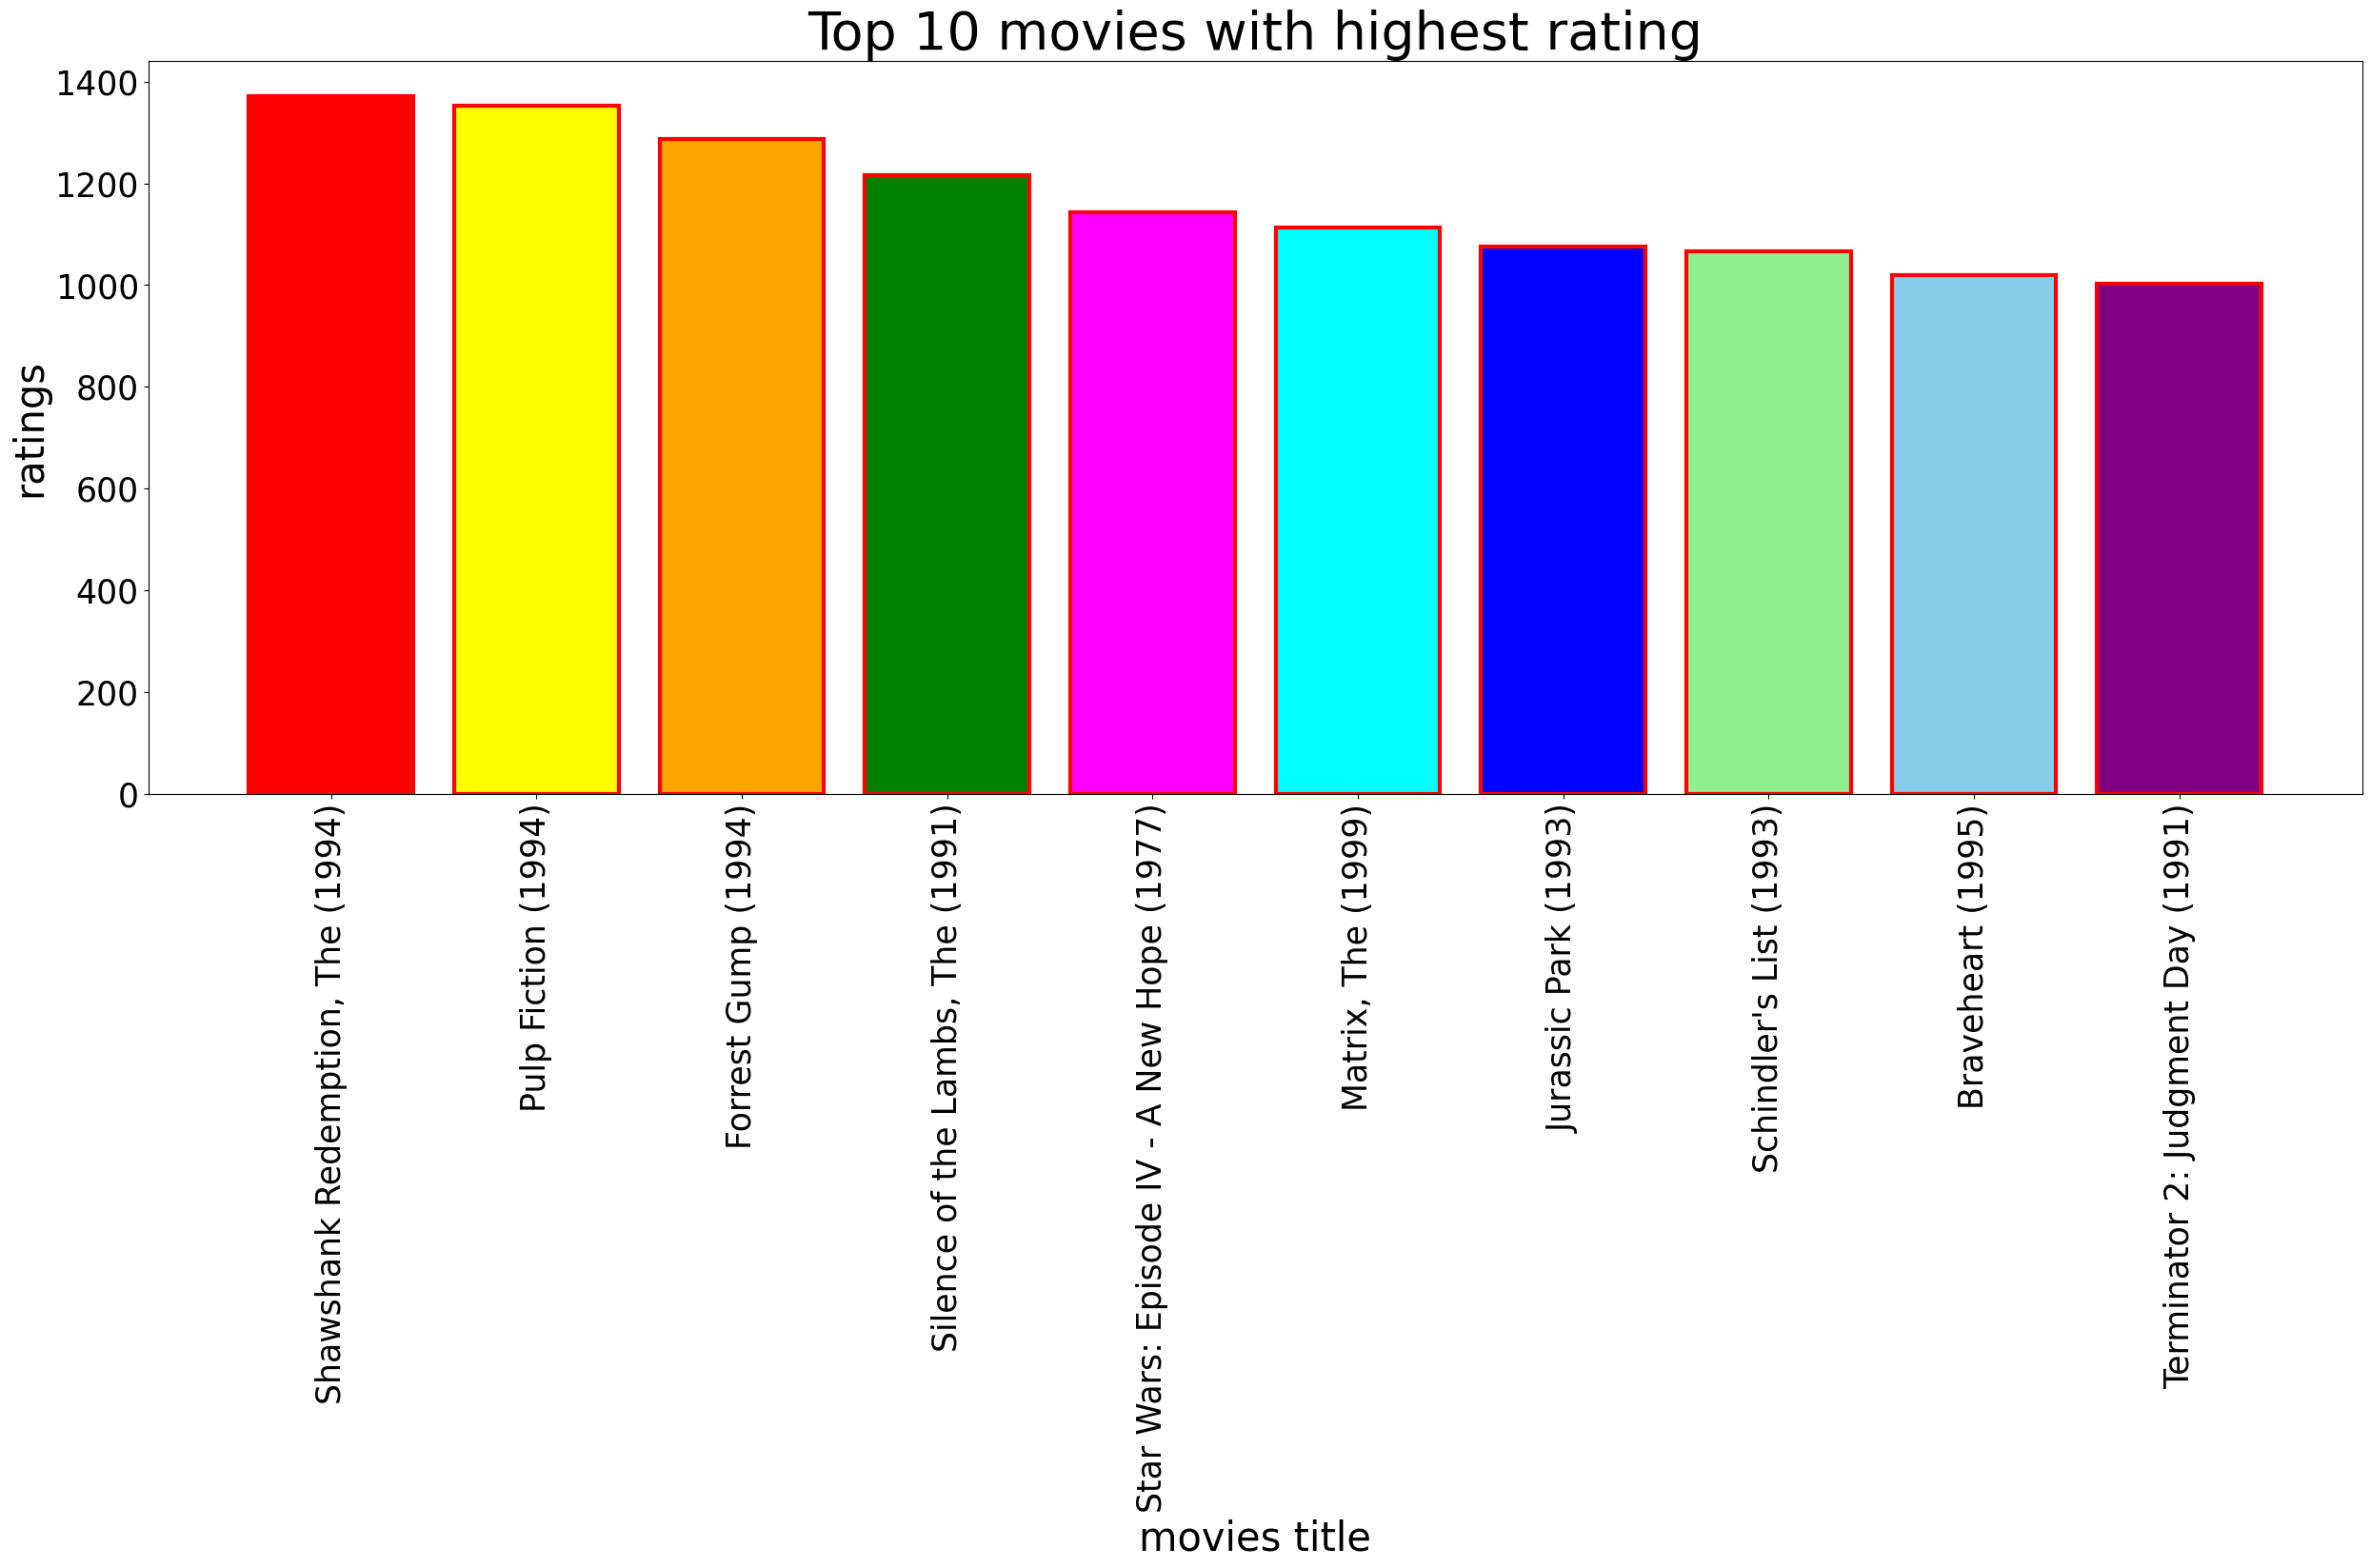

In [41]:
plt.figure(figsize=(30,10))
plt.title('Top 10 movies with highest rating',fontsize=40)
colors=['red','yellow','orange','green','magenta','cyan','blue','lightgreen','skyblue','purple']
plt.ylabel('ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('movies title',fontsize=30)
plt.yticks(fontsize=25)
plt.bar(high_rated.index,high_rated['rating'],linewidth=3,edgecolor='red',color=colors)


In [23]:
# Create a TfidfVectorizer object
cv = TfidfVectorizer()

# Fit the TfidfVectorizer to the 'genres' column of the 'movies' DataFrame and transform it into a TF-IDF matrix
tfidf_matrix = cv.fit_transform(movies['genres'])


In [24]:
# Compute the cosine similarity matrix using the linear_kernel function on the TF-IDF matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [25]:
# Create a pandas Series with movie titles as the index and movie indices as the values
indices = pd.Series(movies.index, index=movies['title'])

# Extract the 'title' column from the 'movies' DataFrame
titles = movies['title']

# Define a function to recommend movies based on cosine similarity
def recommendations(title):
    # Retrieve the index of the given movie title
    idx = indices[title]

    # Get a list of (movie index, cosine similarity score) pairs
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the list by similarity scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Select the top 10 most similar movies, excluding the input movie
    sim_scores = sim_scores[1:11]

    # Extract the indices of these movies
    movie_indices = [score[0] for score in sim_scores]

    # Return the titles of the recommended movies
    return titles.iloc[movie_indices]


In [26]:
recommendations('Braveheart (1995)')


412                     Heaven & Earth (1993)
969                     Apocalypse Now (1979)
993              Boot, Das (Boat, The) (1981)
1496    All Quiet on the Western Front (1930)
1590               Saving Private Ryan (1998)
1936                Thin Red Line, The (1998)
2354                  Dirty Dozen, The (1967)
2449                  Longest Day, The (1962)
2452                 Tora! Tora! Tora! (1970)
2732                          Red Dawn (1984)
Name: title, dtype: object